# a. 

## loading datast 

In [47]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [56]:
digits = datasets.load_digits()

## Plotting dataset

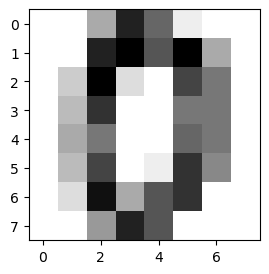

In [49]:
image = digits.images[0]
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

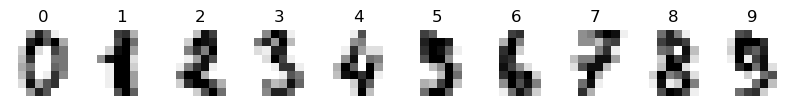

In [50]:
num_images = 10

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images[:num_images], digits.target[:num_images]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(label)

plt.show()

# b.

## Preprocessing 

## Normalization

In [78]:
data = digits.images
data = data / 16.0

## Flattening

In [79]:
n_samples = len(digits.images)
data = data.reshape((n_samples, -1))

## Standardization

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [81]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

# c.

## Kmeans clustering 

In [83]:
from sklearn.cluster import KMeans
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data)

In [88]:
import numpy as np
from sklearn.metrics import accuracy_score

In [89]:
def map_clusters_to_labels(clusters, true_labels):
    label_map = np.zeros_like(clusters)
    for i in range(num_clusters):
        mask = (clusters == i)
        most_common = np.bincount(true_labels[mask]).argmax()
        label_map[mask] = most_common
    return label_map

predicted_labels = map_clusters_to_labels(clusters, digits.target)



# d.

## Hierarchical clusterin

In [92]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
hierarchical_clusters = hierarchical.fit_predict(data)

hierarchical_predicted_labels = map_clusters_to_labels(hierarchical_clusters, digits.target)



# e.

In [98]:
accuracy = accuracy_score(digits.target, predicted_labels)
print(accuracy)

0.6210350584307178


In [99]:
hierarchical_accuracy = accuracy_score(digits.target, hierarchical_predicted_labels)
print(hierarchical_accuracy)

0.7579298831385642


# f.

In [100]:
def map_clusters_to_labels(clusters, true_labels):
    label_map = np.zeros_like(clusters)
    for i in range(num_clusters):
        mask = (clusters == i)
        most_common = np.bincount(true_labels[mask]).argmax()
        label_map[mask] = most_common
    return label_map

predicted_labels = map_clusters_to_labels(clusters, digits.target)
